<a href="https://colab.research.google.com/github/DanishJameel/Open_source/blob/main/Breask_Cancer_Code__Second_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#importing the Important Librararies
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px





# Data Preprocessing and Data Visualization

In [ ]:
df= pd.read_csv("/content/breast_cancer.csv")

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Print all columns in the DataFrame
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Print all columns in the DataFrame
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
# Find null values in the DataFrame
null_counts = df.isnull().sum()

# Print the number of null values in each column
print(null_counts)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# Get a list of feature names
feature_names = list(df.columns)

# Print the feature names
print(feature_names)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Select the column containing the labels and assign it to y
y = df.diagnosis  # y will be a pandas Series object

# Specify a list of column labels to drop from the DataFrame, including the label column and any other unwanted columns
drop_list = ['diagnosis']

# Create a new DataFrame x that contains only the feature columns by dropping the columns specified in drop_list
x = df.drop(drop_list, axis=1)

# Display the first few rows of the new DataFrame x
print(x.head())


         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

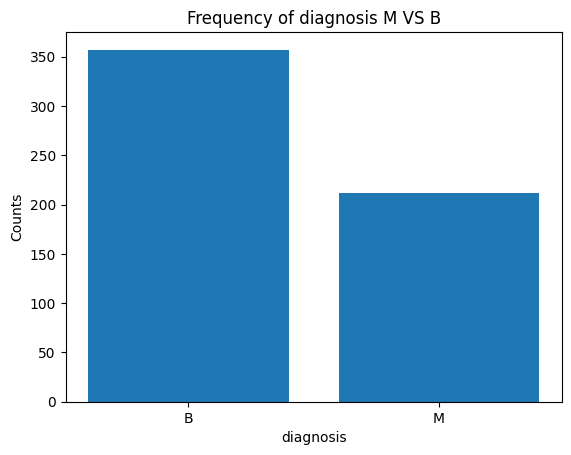

In [ ]:
# Plot the value counts of the "diagnosis" column using a bar chart
counts = df['diagnosis'].value_counts()
plt.bar(counts.index, counts.values)

# Add labels and title to the plot
plt.xlabel('diagnosis')
plt.ylabel('Counts')
plt.title('Frequency of diagnosis M VS B')

# Show the plot
plt.show()

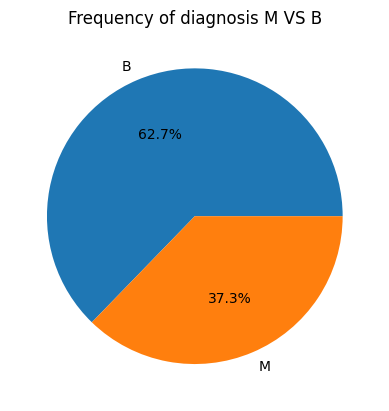

In [ ]:
# Plot the value counts using a pie chart
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')

# Add title to the plot
plt.title('Frequency of diagnosis M VS B')

# Show the plot
plt.show()


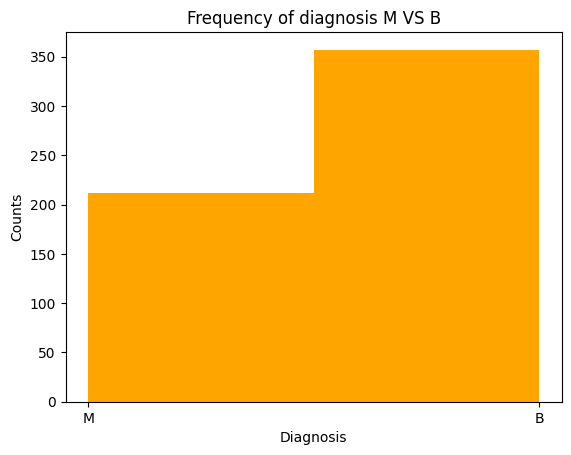

In [ ]:
import matplotlib.pyplot as plt

# Get value counts of the "diagnosis" column
counts = df['diagnosis'].value_counts()

# Sort the counts in ascending order
counts = counts.sort_index()

plt.hist(df['diagnosis'], bins=2, color='orange')


# Add labels and title to the plot
plt.xlabel('Diagnosis')
plt.ylabel('Counts')
plt.title('Frequency of diagnosis M VS B')

# Show the plot
plt.show()


<ipython-input-18-9095c6db02d2>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



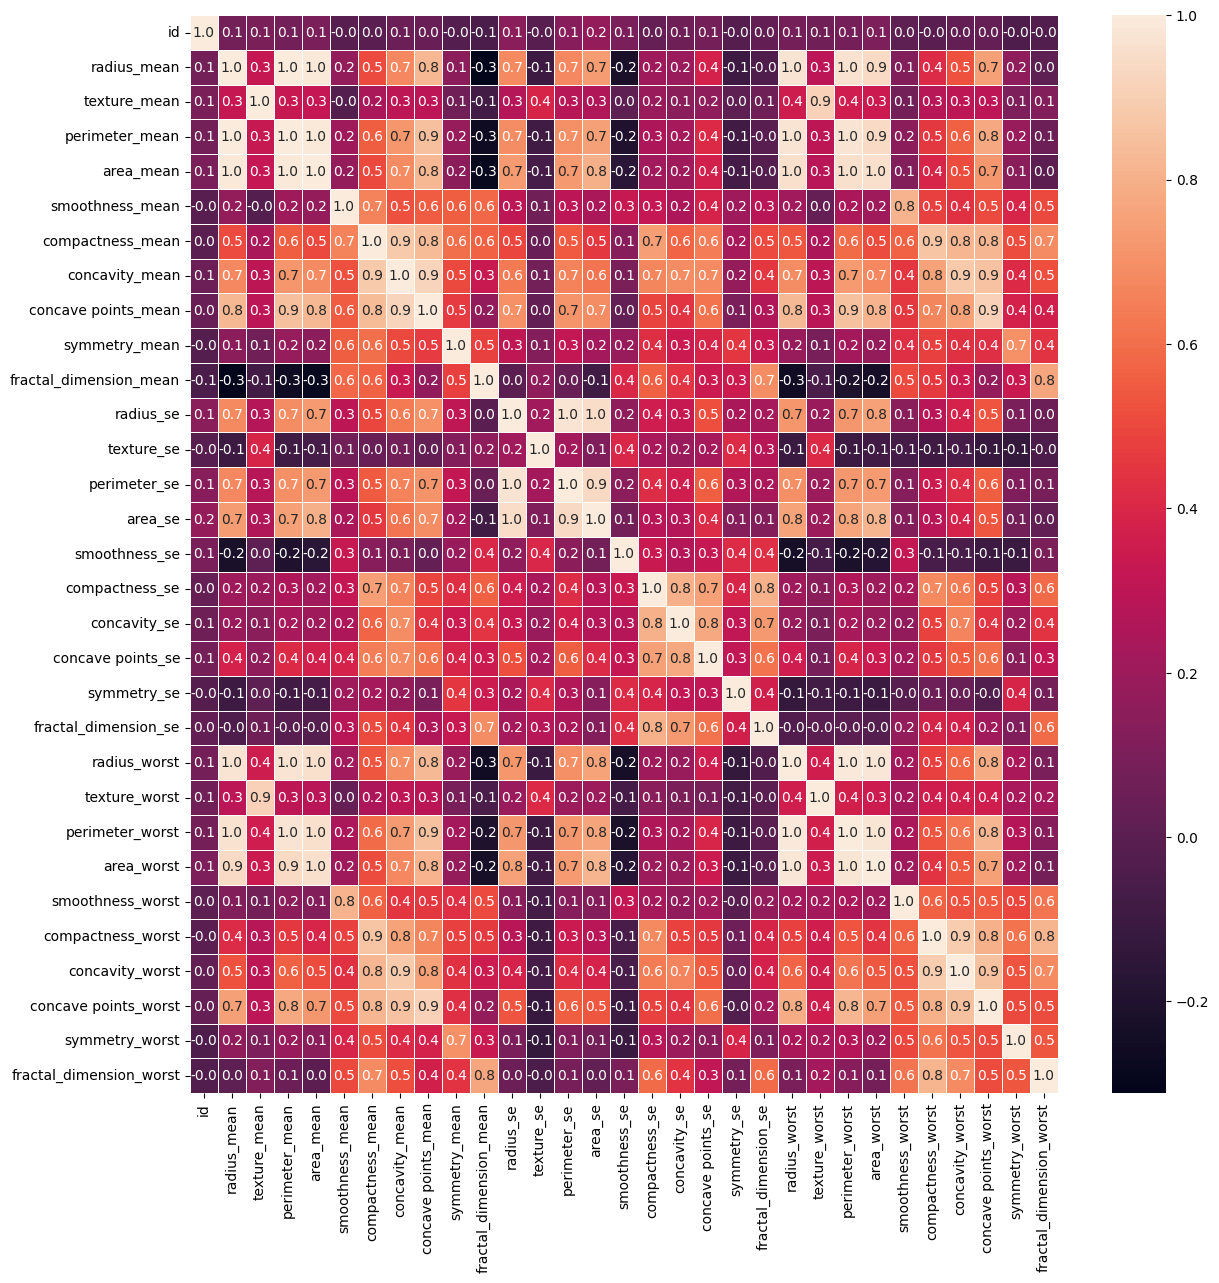

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a size of 14x14 inches
f, ax = plt.subplots(figsize=(14, 14))

# Create a correlation matrix using the corr() function of the pandas DataFrame
corr_mat = df.corr()

# Create a heatmap of the correlation matrix using the heatmap() function of the seaborn library
# Set the parameters: annot=True to display the correlation values in the heatmap cells,
# linewidths=.5 to add borders between cells, fmt='.1f' to format the correlation values to one decimal place,
# and ax=ax to specify the plot axes
sns.heatmap(corr_mat, annot=True, linewidths=.5, fmt='.1f', ax=ax)

# Display the plot
plt.show()


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Convert the 'diagnosis' column to binary values
# 1 for malignant ('M') and 0 for benign ('B')
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)


<ipython-input-22-b687097df75f>:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-b687097df75f>:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-b687097df75f>:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

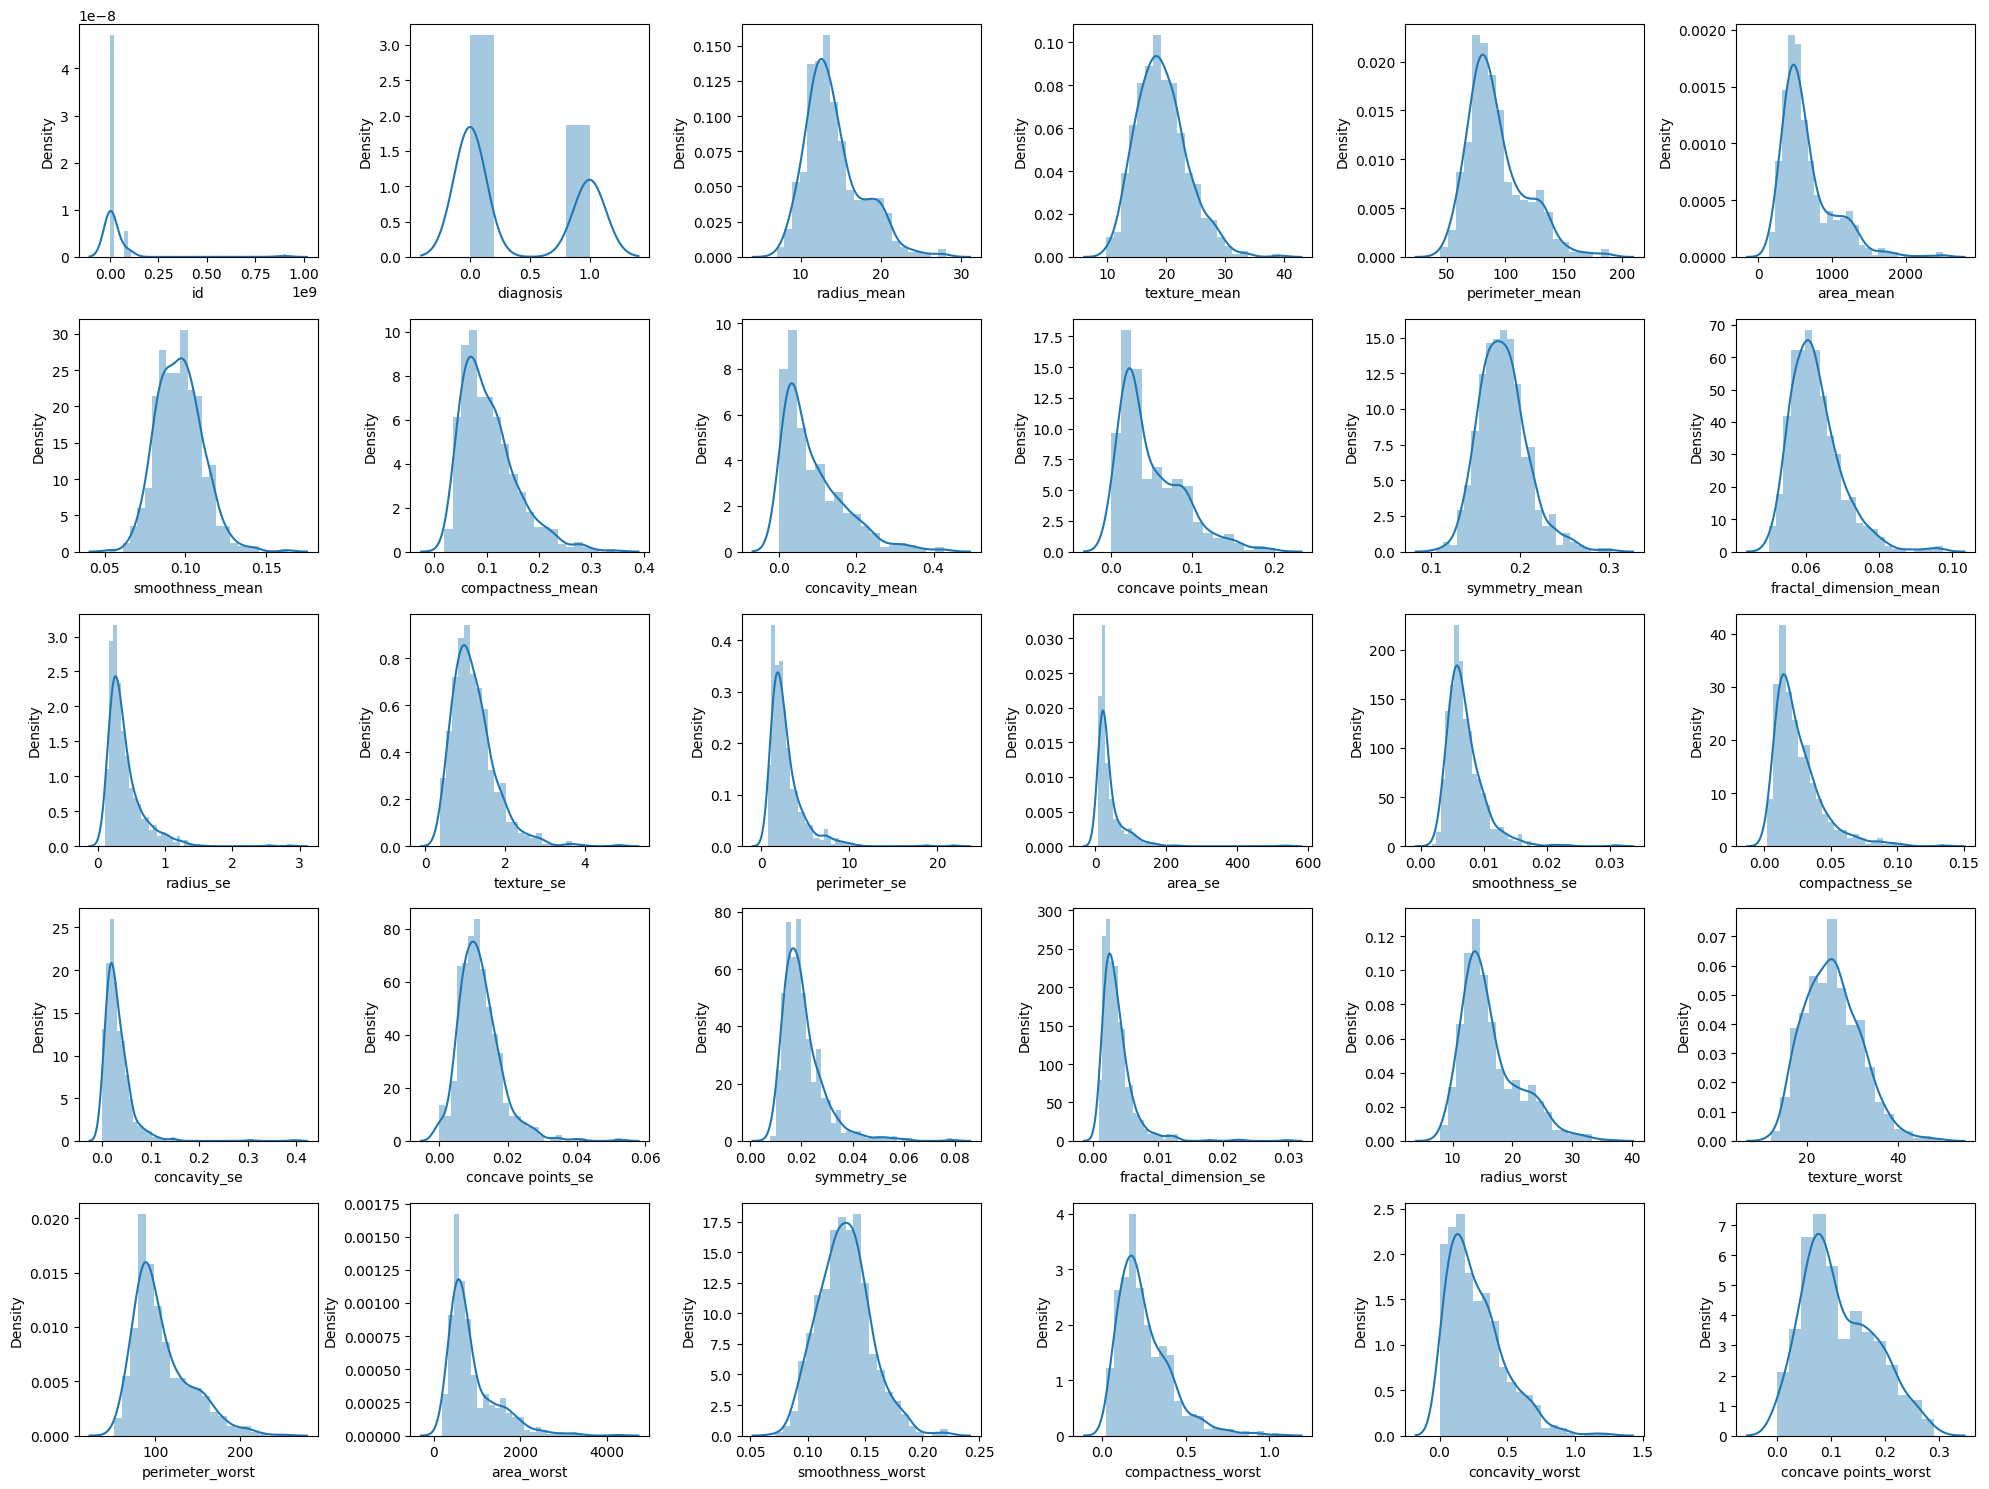

In [ ]:
# Exploratory data analysis
# Set the figure size
plt.figure(figsize = (20, 15))

# Initialize the plotnumber to 1
plotnumber = 1

# Loop through each column in the dataframe
for column in df:

    # If the plotnumber is less than or equal to 30
    if plotnumber <= 30:

        # Create a subplot with 5 rows and 6 columns, and set the current plot to ax
        ax = plt.subplot(5, 6, plotnumber)

        # Plot a distribution plot (histogram and kernel density estimate) of the current column
        sns.distplot(df[column])

        # Set the x-label to the name of the current column
        plt.xlabel(column)

    # Increment the plotnumber by 1 for the next iteration of the loop
    plotnumber += 1

# Adjust the layout of the subplots for better spacing
plt.tight_layout()

# Show the plot
plt.show()


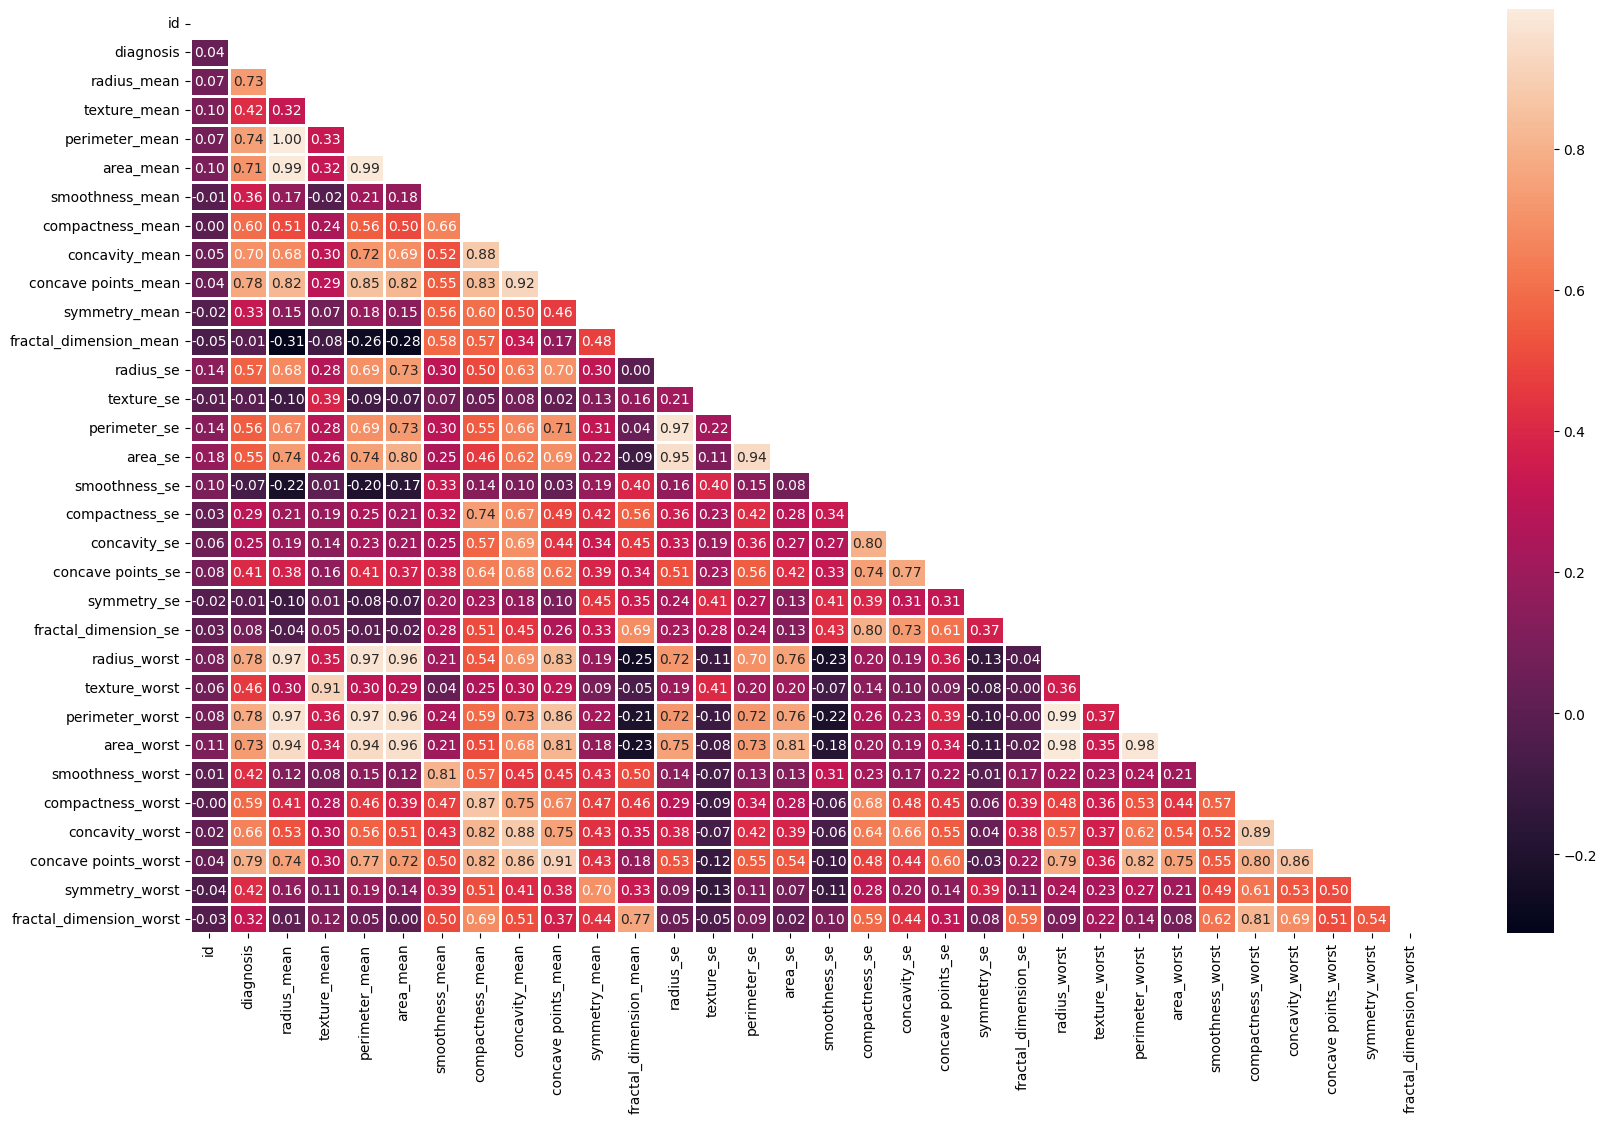

In [ ]:
# heatmap

# Set the figure size
plt.figure(figsize = (20, 12))

# Calculate the correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Plot the heatmap with annotated values
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")

# Show the plot
plt.show()


From the correlation heatmap, it can be observed that several columns in the dataset have high correlation with each other. This indicates multicollinearity, which can lead to instability in the model and inaccurate results. Therefore, it is necessary to remove highly correlated features to improve the model's performance.

In [ ]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

In [ ]:
#creating a correlation matrix and masking the upper triangle
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

#getting list of columns to drop based on correlation threshold
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

#dropping highly correlated features from the dataframe
df = df.drop(to_drop, axis=1)

#printing the number of columns in the reduced dataframe
print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 24 columns.


In [ ]:
# Feature Engineering and Labeling
#Splitting the dataset into features and target variable
#The features will not include the diagnosis column, which is the target variable we want to predict
X = df.drop('diagnosis', axis=1) # Features
y = df['diagnosis'] # Target variable

In [ ]:
X

,id,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,22.39,0.11100,0.11590,0.13890,0.1726,0.05623,1.2560,158.70,0.010300,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,28.25,0.09780,0.10340,0.09791,0.1752,0.05533,2.4630,99.04,0.005769,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,28.08,0.08455,0.10230,0.05302,0.1590,0.05648,1.0750,48.55,0.005903,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,29.33,0.11780,0.27700,0.15200,0.2397,0.07016,1.5950,86.22,0.006522,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Encoding The data sets

Epoch 1/200
15/15 [==============================] - 1s 17ms/step - loss: 0.7554 - accuracy: 0.4813 - val_loss: 0.7509 - val_accuracy: 0.5000
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.7372 - accuracy: 0.5319 - val_loss: 0.7304 - val_accuracy: 0.5351
Epoch 3/200
15/15 [==============================] - 0s 4ms/step - loss: 0.7197 - accuracy: 0.5736 - val_loss: 0.7102 - val_accuracy: 0.5877
Epoch 4/200
15/15 [==============================] - 0s 4ms/step - loss: 0.7028 - accuracy: 0.5978 - val_loss: 0.6919 - val_accuracy: 0.6053
Epoch 5/200
15/15 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.6088 - val_loss: 0.6741 - val_accuracy: 0.6140
Epoch 6/200
15/15 [==============================] - 0s 5ms/step - loss: 0.6720 - accuracy: 0.6154 - val_loss: 0.6574 - val_accuracy: 0.6228
Epoch 7/200
15/15 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.6110 - val_loss: 0.6416 - val_accuracy: 0.6316
Epoch 8/200


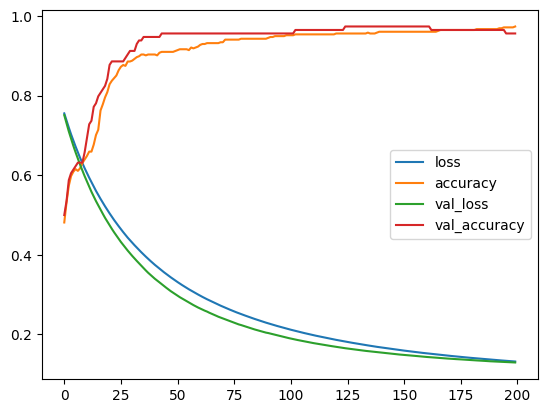

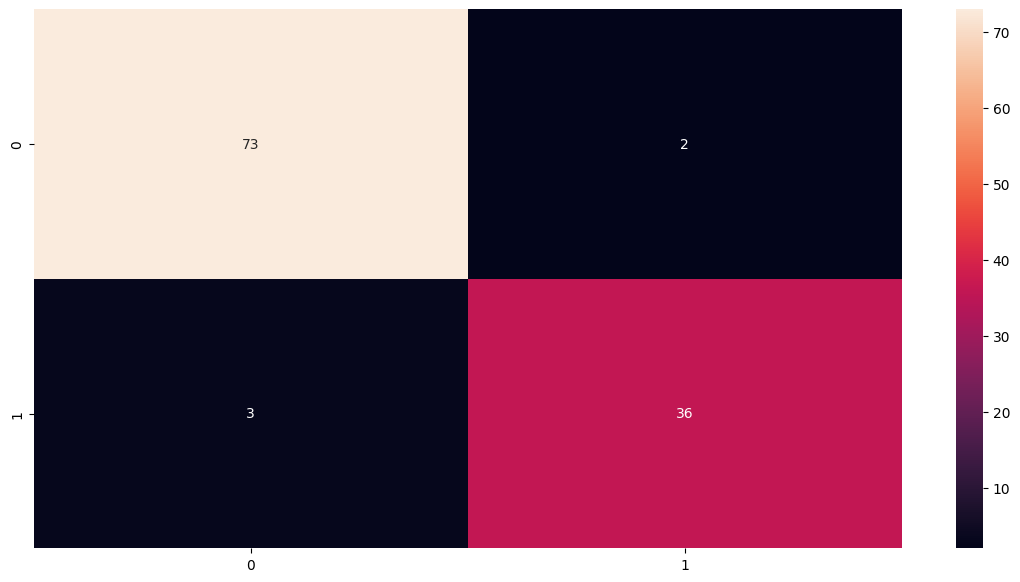

In [ ]:
#importing necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding the target variable
lb = LabelEncoder()
y = lb.fit_transform(y)

#Splitting the data into training and testing sets
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size=0.2, random_state=40)

#Scaling the training and testing sets using StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

#Creating the ANN using sequential model and adding layers to it
ann = Sequential()

#Adding the first hidden layer with 13 neurons
ann.add(Dense(units=14, activation='sigmoid', input_dim=X.shape[1]))

#Adding the output layer with 1 neuron as this is a binary classification problem
ann.add(Dense(units=1, activation='sigmoid'))

#Compiling the ANN using Stochastic Gradient Descent optimizer
ann.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

#Setting up early stopping to monitor maximum accuracy
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#Training the ANN with batch size of 32
model = ann.fit(xtrain, ytrain, batch_size=32, validation_data=(xtest, ytest), epochs=200, callbacks=[early_stop])

#Printing the summary of the model's layers
ann.summary()

#Plotting the losses of the model
losses = pd.DataFrame(ann.history.history)
losses.plot()

#Testing the model on test data and generating the confusion matrix and accuracy score
y_pred = ann.predict(xtest)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(ytest, y_pred)
score = accuracy_score(ytest, y_pred)
print(cm)
print('Acuuraccy  score is:',score)

#Generating the classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,y_pred))

#Creating a heatmap of the confusion matrix
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()


In [ ]:
# Import required libraries
from sklearn.metrics import confusion_matrix, classification_report

# Predict the test set results and convert probabilities to binary predictions
y_pred = (ann.predict(xtest) > 0.5)

# Calculate and print the confusion matrix
cm = confusion_matrix(ytest, y_pred)
print('Confusion Matrix:\n', cm)

# Calculate and print the accuracy score
accuracy = accuracy_score(ytest, y_pred)
print('Accuracy Score:', accuracy)

# Calculate and print the precision and recall scores
report = classification_report(ytest, y_pred)
print('Classification Report:\n', report)


4/4 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[73  2]
 [ 3 36]]
Accuracy Score: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.95      0.92      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



4/4 [==============================] - 0s 4ms/step
Accuracy: 95.61%
Precision: 94.74%
Recall: 92.31%


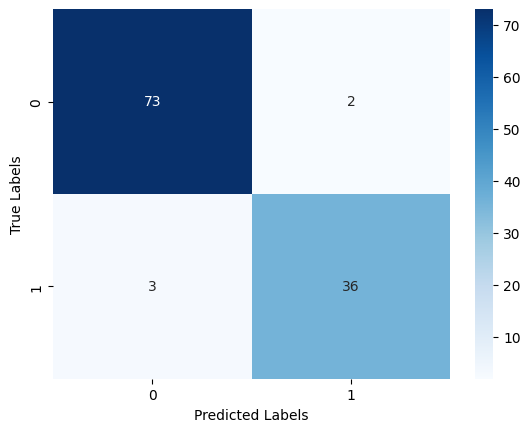

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Make predictions on the test set
y_pred = ann.predict(xtest)

# Convert predicted probabilities to binary predictions
y_pred = (y_pred > 0.5)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

# Calculate and plot the confusion matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
